## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 1.0127823	total: 71.5ms	remaining: 1m 11s
1:	learn: 0.9922140	total: 72.6ms	remaining: 36.2s
2:	learn: 0.9711011	total: 73.6ms	remaining: 24.5s
3:	learn: 0.9536148	total: 74.7ms	remaining: 18.6s
4:	learn: 0.9353292	total: 75.6ms	remaining: 15s
5:	learn: 0.9179908	total: 76.5ms	remaining: 12.7s
6:	learn: 0.9015004	total: 77.3ms	remaining: 11s
7:	learn: 0.8833443	total: 78.1ms	remaining: 9.68s
8:	learn: 0.8670455	total: 78.8ms	remaining: 8.68s
9:	learn: 0.8505472	total: 79.6ms	remaining: 7.88s
10:	learn: 0.8331123	total: 80.4ms	remaining: 7.23s
11:	learn: 0.8190686	total: 81.2ms	remaining: 6.68s
12:	learn: 0.8043704	total: 82.1ms	remaining: 6.23s
13:	learn: 0.7908402	total: 83ms	remaining: 5.84s
14:	learn: 0.7771120	total: 83.8ms	remaining: 5.5s
15:	learn: 0.7628410	total: 84.8ms	remaining: 5.21s
16:	learn: 0.7512021	total: 85.8ms	remaining: 4.96s
17:	learn: 0.7391426	total: 86.6ms	remaining: 4.72s
18:	learn: 0.7257375	total: 87.4ms	remaining: 4.51

25:	learn: 0.6463775	total: 93.8ms	remaining: 3.51s
26:	learn: 0.6370848	total: 94.7ms	remaining: 3.41s
27:	learn: 0.6274902	total: 95.3ms	remaining: 3.31s
28:	learn: 0.6189066	total: 96.1ms	remaining: 3.22s
29:	learn: 0.6086585	total: 97ms	remaining: 3.13s
30:	learn: 0.6000547	total: 97.8ms	remaining: 3.06s
31:	learn: 0.5905413	total: 98.5ms	remaining: 2.98s
32:	learn: 0.5824673	total: 99.3ms	remaining: 2.91s
33:	learn: 0.5757790	total: 100ms	remaining: 2.85s
34:	learn: 0.5689551	total: 101ms	remaining: 2.78s
35:	learn: 0.5605003	total: 102ms	remaining: 2.72s
36:	learn: 0.5532313	total: 103ms	remaining: 2.67s
37:	learn: 0.5453327	total: 103ms	remaining: 2.62s
38:	learn: 0.5385438	total: 104ms	remaining: 2.57s
39:	learn: 0.5316587	total: 105ms	remaining: 2.52s
40:	learn: 0.5248824	total: 106ms	remaining: 2.48s
41:	learn: 0.5187172	total: 107ms	remaining: 2.44s
42:	learn: 0.5132816	total: 108ms	remaining: 2.39s
43:	learn: 0.5061186	total: 108ms	remaining: 2.35s
44:	learn: 0.4994525	tota

141:	learn: 0.2618248	total: 189ms	remaining: 1.14s
142:	learn: 0.2605709	total: 190ms	remaining: 1.14s
143:	learn: 0.2597595	total: 191ms	remaining: 1.13s
144:	learn: 0.2590687	total: 191ms	remaining: 1.13s
145:	learn: 0.2580644	total: 192ms	remaining: 1.12s
146:	learn: 0.2571972	total: 193ms	remaining: 1.12s
147:	learn: 0.2565970	total: 194ms	remaining: 1.12s
148:	learn: 0.2554036	total: 195ms	remaining: 1.11s
149:	learn: 0.2547956	total: 195ms	remaining: 1.11s
150:	learn: 0.2538413	total: 196ms	remaining: 1.1s
151:	learn: 0.2530189	total: 197ms	remaining: 1.1s
152:	learn: 0.2522966	total: 198ms	remaining: 1.1s
153:	learn: 0.2515071	total: 199ms	remaining: 1.09s
154:	learn: 0.2510797	total: 200ms	remaining: 1.09s
155:	learn: 0.2501505	total: 201ms	remaining: 1.08s
156:	learn: 0.2491695	total: 201ms	remaining: 1.08s
157:	learn: 0.2482774	total: 202ms	remaining: 1.08s
158:	learn: 0.2476240	total: 203ms	remaining: 1.07s
159:	learn: 0.2469101	total: 204ms	remaining: 1.07s
160:	learn: 0.2

257:	learn: 0.1898200	total: 283ms	remaining: 815ms
258:	learn: 0.1892871	total: 284ms	remaining: 813ms
259:	learn: 0.1887639	total: 285ms	remaining: 811ms
260:	learn: 0.1881146	total: 286ms	remaining: 810ms
261:	learn: 0.1878713	total: 287ms	remaining: 808ms
262:	learn: 0.1873549	total: 288ms	remaining: 806ms
263:	learn: 0.1869850	total: 288ms	remaining: 804ms
264:	learn: 0.1865272	total: 289ms	remaining: 802ms
265:	learn: 0.1860769	total: 290ms	remaining: 800ms
266:	learn: 0.1859146	total: 291ms	remaining: 798ms
267:	learn: 0.1853425	total: 291ms	remaining: 796ms
268:	learn: 0.1847738	total: 292ms	remaining: 794ms
269:	learn: 0.1844480	total: 293ms	remaining: 792ms
270:	learn: 0.1840560	total: 294ms	remaining: 790ms
271:	learn: 0.1836153	total: 295ms	remaining: 789ms
272:	learn: 0.1831406	total: 296ms	remaining: 787ms
273:	learn: 0.1825335	total: 296ms	remaining: 785ms
274:	learn: 0.1821103	total: 297ms	remaining: 783ms
275:	learn: 0.1817016	total: 298ms	remaining: 782ms
276:	learn: 

370:	learn: 0.1504610	total: 379ms	remaining: 642ms
371:	learn: 0.1501786	total: 380ms	remaining: 641ms
372:	learn: 0.1499552	total: 381ms	remaining: 640ms
373:	learn: 0.1496959	total: 382ms	remaining: 639ms
374:	learn: 0.1494797	total: 383ms	remaining: 638ms
375:	learn: 0.1493013	total: 383ms	remaining: 636ms
376:	learn: 0.1490805	total: 384ms	remaining: 635ms
377:	learn: 0.1488867	total: 385ms	remaining: 634ms
378:	learn: 0.1484950	total: 386ms	remaining: 632ms
379:	learn: 0.1480980	total: 387ms	remaining: 631ms
380:	learn: 0.1478259	total: 388ms	remaining: 630ms
381:	learn: 0.1475625	total: 388ms	remaining: 628ms
382:	learn: 0.1473682	total: 389ms	remaining: 627ms
383:	learn: 0.1471382	total: 390ms	remaining: 626ms
384:	learn: 0.1469471	total: 391ms	remaining: 624ms
385:	learn: 0.1466096	total: 392ms	remaining: 623ms
386:	learn: 0.1463898	total: 392ms	remaining: 622ms
387:	learn: 0.1460073	total: 393ms	remaining: 620ms
388:	learn: 0.1457344	total: 394ms	remaining: 619ms
389:	learn: 

482:	learn: 0.1244263	total: 474ms	remaining: 507ms
483:	learn: 0.1242851	total: 475ms	remaining: 506ms
484:	learn: 0.1240234	total: 475ms	remaining: 505ms
485:	learn: 0.1239285	total: 476ms	remaining: 504ms
486:	learn: 0.1237765	total: 477ms	remaining: 503ms
487:	learn: 0.1235793	total: 478ms	remaining: 501ms
488:	learn: 0.1235066	total: 479ms	remaining: 500ms
489:	learn: 0.1232031	total: 480ms	remaining: 499ms
490:	learn: 0.1230156	total: 480ms	remaining: 498ms
491:	learn: 0.1227113	total: 481ms	remaining: 497ms
492:	learn: 0.1224861	total: 482ms	remaining: 495ms
493:	learn: 0.1223545	total: 482ms	remaining: 494ms
494:	learn: 0.1220770	total: 483ms	remaining: 493ms
495:	learn: 0.1218328	total: 484ms	remaining: 492ms
496:	learn: 0.1216913	total: 485ms	remaining: 491ms
497:	learn: 0.1214980	total: 486ms	remaining: 490ms
498:	learn: 0.1212599	total: 486ms	remaining: 488ms
499:	learn: 0.1210644	total: 487ms	remaining: 487ms
500:	learn: 0.1208376	total: 488ms	remaining: 486ms
501:	learn: 

596:	learn: 0.1032742	total: 569ms	remaining: 384ms
597:	learn: 0.1031069	total: 570ms	remaining: 383ms
598:	learn: 0.1029042	total: 571ms	remaining: 382ms
599:	learn: 0.1028616	total: 572ms	remaining: 381ms
600:	learn: 0.1025724	total: 573ms	remaining: 380ms
601:	learn: 0.1024718	total: 573ms	remaining: 379ms
602:	learn: 0.1023008	total: 574ms	remaining: 378ms
603:	learn: 0.1022771	total: 575ms	remaining: 377ms
604:	learn: 0.1021232	total: 576ms	remaining: 376ms
605:	learn: 0.1021010	total: 577ms	remaining: 375ms
606:	learn: 0.1019822	total: 578ms	remaining: 374ms
607:	learn: 0.1018393	total: 578ms	remaining: 373ms
608:	learn: 0.1017094	total: 579ms	remaining: 372ms
609:	learn: 0.1015110	total: 580ms	remaining: 371ms
610:	learn: 0.1014842	total: 581ms	remaining: 370ms
611:	learn: 0.1013786	total: 582ms	remaining: 369ms
612:	learn: 0.1011960	total: 582ms	remaining: 368ms
613:	learn: 0.1010394	total: 583ms	remaining: 367ms
614:	learn: 0.1008481	total: 584ms	remaining: 366ms
615:	learn: 

709:	learn: 0.0880413	total: 664ms	remaining: 271ms
710:	learn: 0.0879224	total: 665ms	remaining: 270ms
711:	learn: 0.0878591	total: 666ms	remaining: 269ms
712:	learn: 0.0877631	total: 667ms	remaining: 268ms
713:	learn: 0.0875735	total: 668ms	remaining: 267ms
714:	learn: 0.0874707	total: 668ms	remaining: 266ms
715:	learn: 0.0874300	total: 669ms	remaining: 265ms
716:	learn: 0.0874053	total: 670ms	remaining: 264ms
717:	learn: 0.0872929	total: 671ms	remaining: 263ms
718:	learn: 0.0871891	total: 671ms	remaining: 262ms
719:	learn: 0.0870214	total: 672ms	remaining: 261ms
720:	learn: 0.0868445	total: 673ms	remaining: 260ms
721:	learn: 0.0867356	total: 674ms	remaining: 259ms
722:	learn: 0.0866111	total: 675ms	remaining: 258ms
723:	learn: 0.0865345	total: 675ms	remaining: 258ms
724:	learn: 0.0864064	total: 676ms	remaining: 257ms
725:	learn: 0.0863048	total: 677ms	remaining: 256ms
726:	learn: 0.0862385	total: 678ms	remaining: 255ms
727:	learn: 0.0861038	total: 679ms	remaining: 254ms
728:	learn: 

826:	learn: 0.0752855	total: 760ms	remaining: 159ms
827:	learn: 0.0751287	total: 760ms	remaining: 158ms
828:	learn: 0.0749708	total: 761ms	remaining: 157ms
829:	learn: 0.0748526	total: 762ms	remaining: 156ms
830:	learn: 0.0746929	total: 763ms	remaining: 155ms
831:	learn: 0.0746337	total: 764ms	remaining: 154ms
832:	learn: 0.0744719	total: 765ms	remaining: 153ms
833:	learn: 0.0743059	total: 766ms	remaining: 152ms
834:	learn: 0.0741881	total: 767ms	remaining: 152ms
835:	learn: 0.0740427	total: 768ms	remaining: 151ms
836:	learn: 0.0740175	total: 768ms	remaining: 150ms
837:	learn: 0.0739314	total: 770ms	remaining: 149ms
838:	learn: 0.0738935	total: 771ms	remaining: 148ms
839:	learn: 0.0737540	total: 772ms	remaining: 147ms
840:	learn: 0.0736819	total: 772ms	remaining: 146ms
841:	learn: 0.0736055	total: 773ms	remaining: 145ms
842:	learn: 0.0735199	total: 774ms	remaining: 144ms
843:	learn: 0.0734257	total: 775ms	remaining: 143ms
844:	learn: 0.0733897	total: 775ms	remaining: 142ms
845:	learn: 

940:	learn: 0.0647754	total: 854ms	remaining: 53.5ms
941:	learn: 0.0646805	total: 855ms	remaining: 52.6ms
942:	learn: 0.0646140	total: 856ms	remaining: 51.7ms
943:	learn: 0.0645576	total: 857ms	remaining: 50.8ms
944:	learn: 0.0644208	total: 858ms	remaining: 49.9ms
945:	learn: 0.0643401	total: 859ms	remaining: 49ms
946:	learn: 0.0643108	total: 859ms	remaining: 48.1ms
947:	learn: 0.0642254	total: 860ms	remaining: 47.2ms
948:	learn: 0.0641506	total: 861ms	remaining: 46.3ms
949:	learn: 0.0641305	total: 862ms	remaining: 45.4ms
950:	learn: 0.0641067	total: 863ms	remaining: 44.5ms
951:	learn: 0.0640190	total: 864ms	remaining: 43.6ms
952:	learn: 0.0639367	total: 865ms	remaining: 42.7ms
953:	learn: 0.0638888	total: 866ms	remaining: 41.7ms
954:	learn: 0.0638078	total: 867ms	remaining: 40.8ms
955:	learn: 0.0637656	total: 867ms	remaining: 39.9ms
956:	learn: 0.0636298	total: 868ms	remaining: 39ms
957:	learn: 0.0635541	total: 869ms	remaining: 38.1ms
958:	learn: 0.0634842	total: 870ms	remaining: 37.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

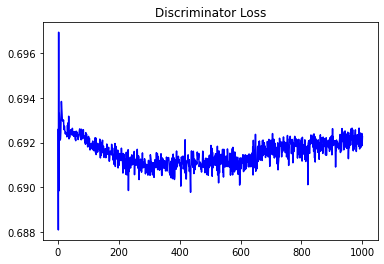

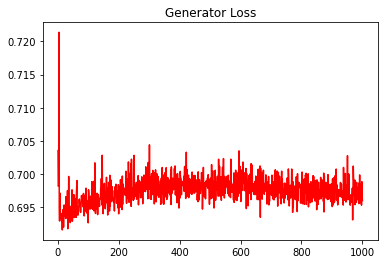

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08814754729180133


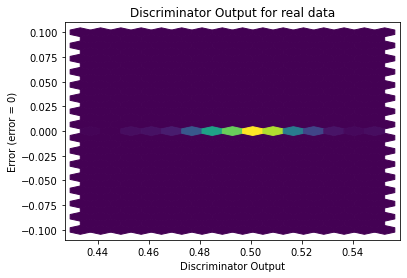

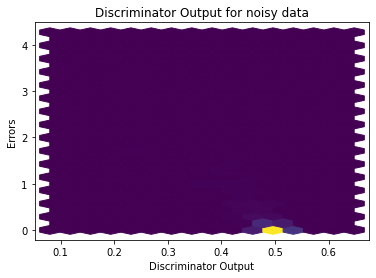

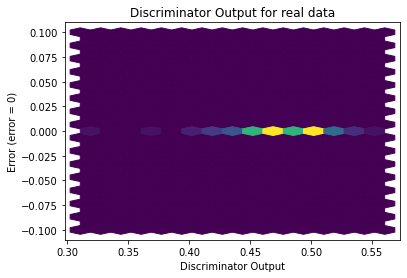

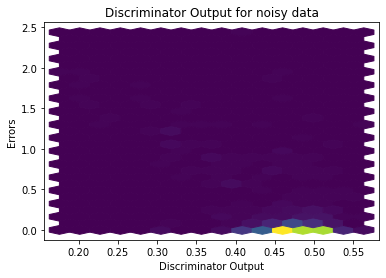

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


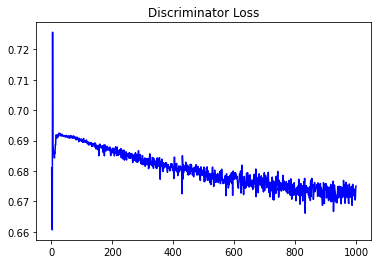

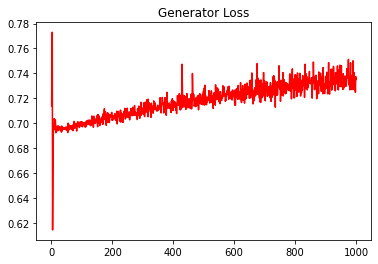

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09409455248263597


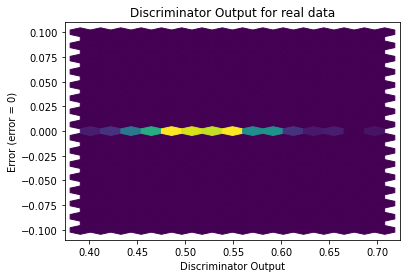

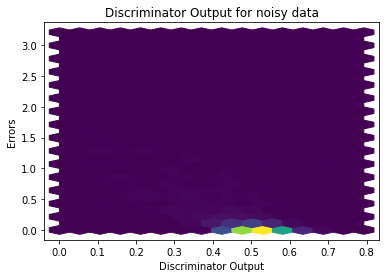

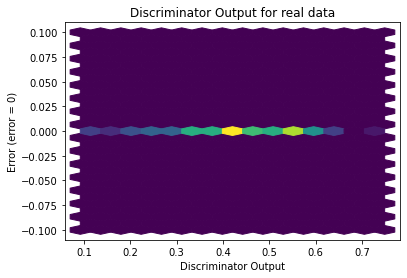

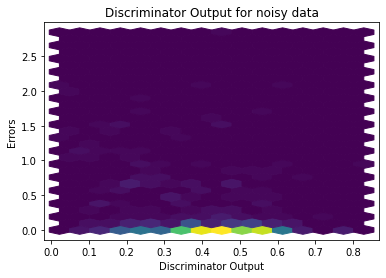

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1878]], requires_grad=True)
